# Binary Heap

- Heap data structure created using a binary tree
- It is a **complete** binary tree, all levels are filled except possibly the last. If the last level is not full, it's filled from the left to the right.
- The **Heap Property** states that all nodes are either >= their children (max heap) or <= their children (min heap).
- Heaps can be represented in an array.

## Implementation

### Insertion
- Values can be inserted into a heap by inserting the value at the bottom of the heap, and the recursively comparing the value with its parent, swapping if larger/smaller (depending on whether it's a min/max heap).

### Removal
- The remove the max/min value, extract the root node, and replace it with the node from the bottom of the heap, then swap the moved element with its children (if there is one that is larger/smaller) until the heap property is restored.

[1, 2, 3, 5, 8, 10, 6, 132, 33]


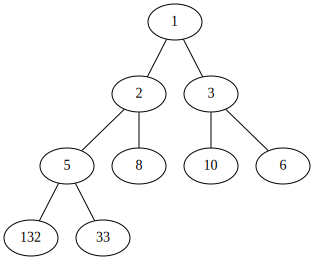

In [2]:
class BinaryHeap(object):
    def __init__(self, cmp_f, values):
        self.cmp_f = cmp_f
        self.values = []
        
        for v in values:
            self.insert(v)
    
    def _parent_index(self, index):
        return index / 2
    
    def _left_child_index(self, index):
        return index * 2 + 1
    
    def _right_child_index(self, index):
        return index * 2 + 2
    
    def insert(self, value):
        def insert_inner(index):
            if index > 0:
                pi = self._parent_index(index)

                if self.cmp_f(self.values[index], self.values[pi]):
                    self.values[index], self.values[pi] = self.values[pi], self.values[index]
                    insert_inner(pi)
        
        self.values.append(value)
        insert_inner(len(self.values)-1)
        
    def remove(self, value):
        def remove_inner(index):
            lefti = self._left_child_index(index)
            righti = self._right_child_index(index)
            
            leftv = self.values[lefti] if lefti < len(self.values) else None
            rightv = self.values[righti] if righti < len(self.values) else None
            
            if self.cmp_f(leftv, rightv):
                
            

def min_heap(x,y):
    return x <= y

def render_binary_heap(heap):
    from graphviz import Graph

    dot = Graph()
    def render_inner(prev_index, root_index, graph):
        if root_index < len(heap.values):
            value = str(heap.values[root_index])
            graph.node(value)
            left_index = root_index * 2 + 1
            right_index = root_index * 2 + 2
            
            render_inner(root_index, left_index, graph)
            render_inner(root_index, right_index, graph)
            
            if prev_index >= 0:
                graph.edge(str(heap.values[prev_index]), str(value))
                
        return graph
    
    return render_inner(-1, 0, dot)

b = BinaryHeap(min_heap, [8,2,3,5,1,10,6,132,33])
render_binary_heap(b)